### POSTTEST 6 - UNSUPERVISED LEARNING
### Nama   :   Wahyu Harry Saputra Sembiring
### NIM      :    2009106049
### Kelas   :    Informatika A 2020

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.cluster import KMeans 
import sklearn.datasets as dts

In [96]:
df = pd.read_csv('Sofia_Temperature.csv')

In [97]:
df.head()

,Date_Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition
0,2010-01-01 00:00,55,37,51,W,16,0,27.49,Partly Cloudy
1,2010-01-01 00:30,55,0,41,WSW,27,0,27.52,Partly Cloudy / Windy
2,2010-01-01 01:00,46,41,81,E,7,0,27.69,Fair
3,2010-01-01 01:30,46,39,76,ESE,7,0,27.69,Fair
4,2010-01-01 02:00,46,39,76,ESE,4,0,27.69,Fair


In [98]:
print("Mengecek jumlah nilai NULL")
df.isna().sum()

Mengecek jumlah nilai NULL


Date_Time      0
Temperature    0
Dew Point      0
Humidity       0
Wind           0
Wind Speed     0
Wind Gust      0
Pressure       0
Condition      0
dtype: int64

### Algoritma K-Means Clustering

In [99]:
model = KMeans(n_clusters=4)

In [100]:
points = df[['Temperature','Humidity']]

In [101]:
model.fit(points)

KMeans(n_clusters=4)

In [102]:
cluster_array = model.labels_

In [103]:
cluster_array

array([3, 1, 2, ..., 1, 1, 3])

In [113]:
dataset_KMeans = pd.DataFrame({'label':cluster_array, 'Condition': df.Condition})

In [ ]:
crosstab = pd.crosstab(dataset_KMeans['label'], dataset_KMeans['Condition'])

In [ ]:
crosstab

### Algoritma Clustering Centroid-based

In [114]:
X = points['Temperature']
Y = points['Humidity']

In [115]:
centroid = model.cluster_centers_

In [116]:
centroid

array([[29.99193262, 91.74979925],
       [64.6719659 , 60.84422496],
       [41.38871854, 68.4869911 ],
       [75.91323911, 37.28629939],
       [55.60065285, 87.40666961]])

In [117]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

In [118]:
crt_X = pd.DataFrame(centroid_X)
crt_X.head()

,0
0,29.991933
1,64.671966
2,41.388719
3,75.913239
4,55.600653


### Tampilan visualisasi dari hasil model

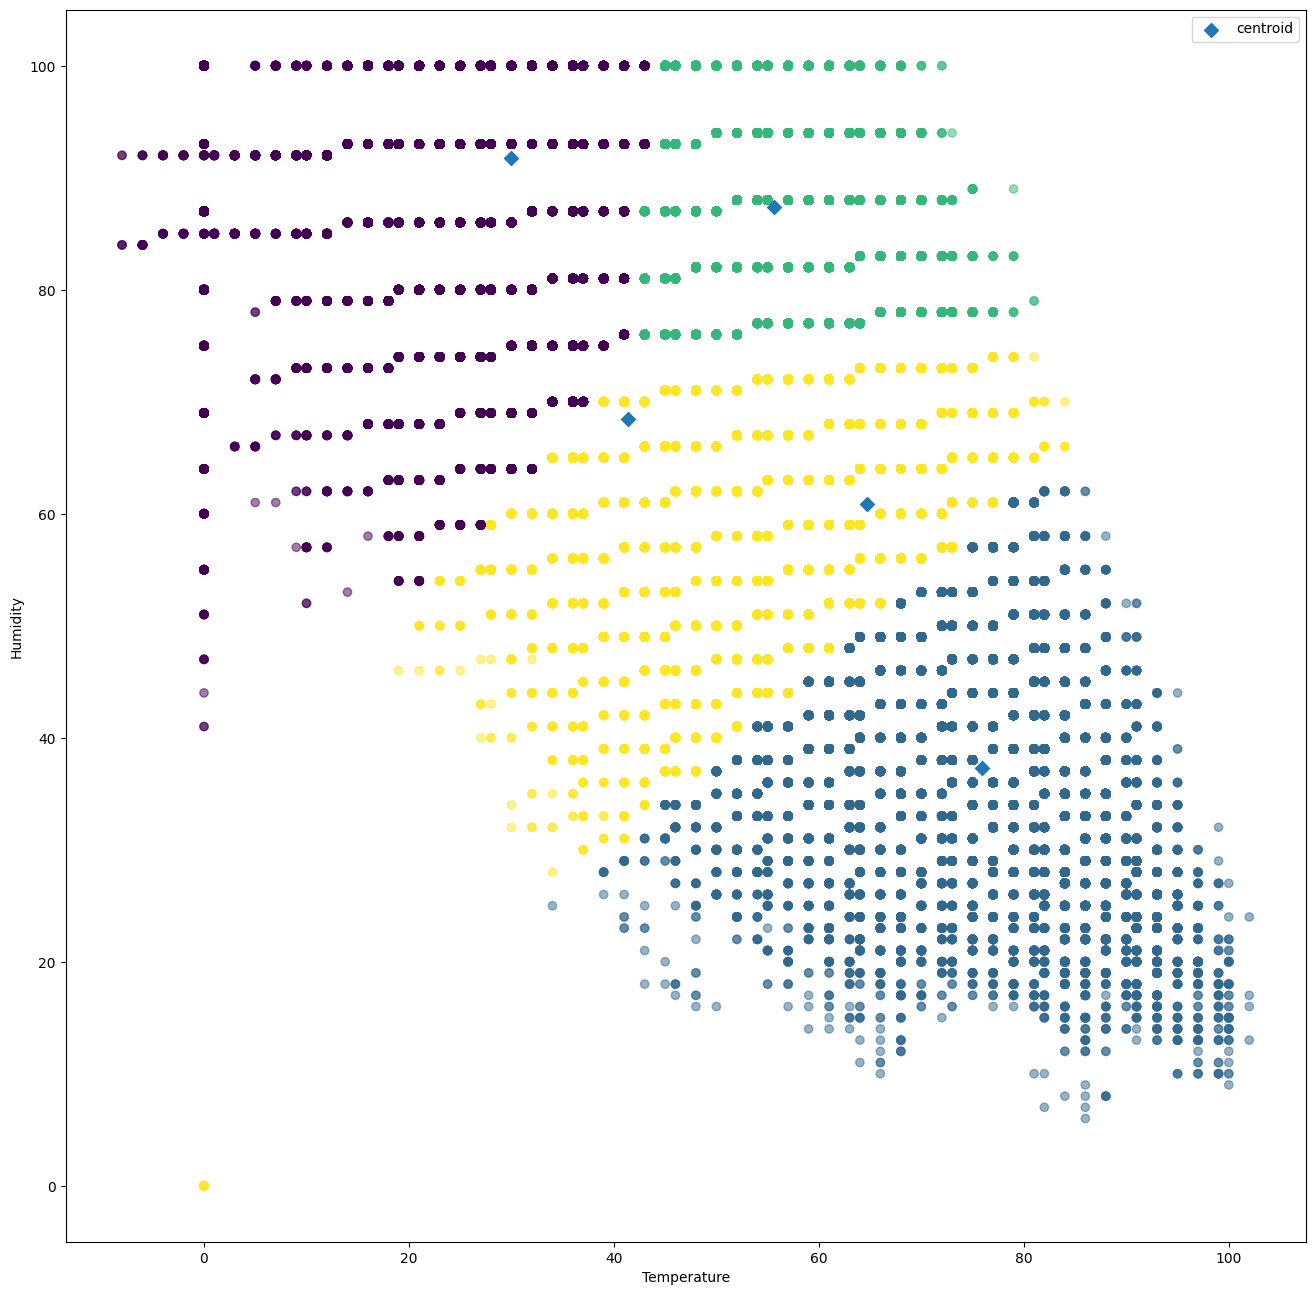

In [119]:
plt.figure(figsize = (16,16))
plt.scatter(X, Y, alpha = 0.5, c=cluster_array)
plt.scatter(centroid_X, centroid_Y, marker = 'D', s = 50, label = 'centroid')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend()
plt.show()

In [120]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

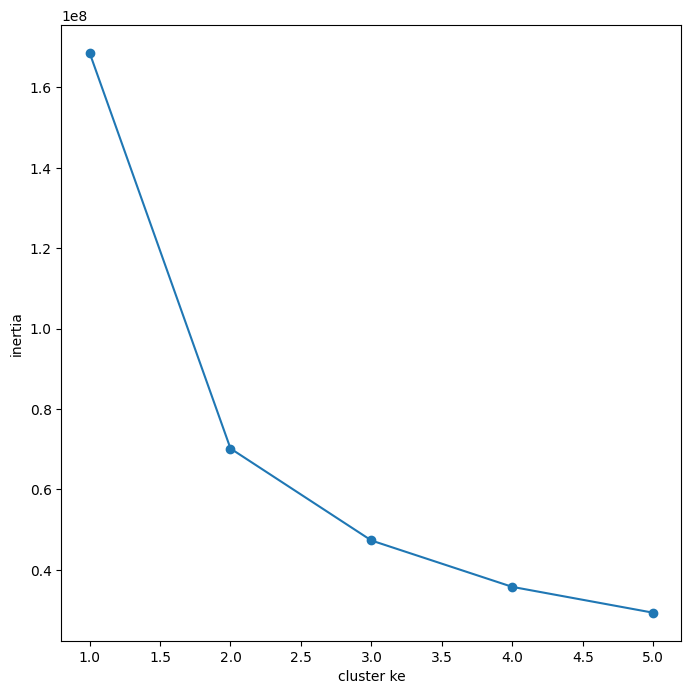

In [112]:
plt.figure(figsize = (8,8))
# plt.scatter(X, Y, alpha = 0.5, c=cluster_array)
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('cluster ke')
plt.ylabel('inertia')
plt.show()